In [1]:
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import  math
from random import randint
import re
import matplotlib
matplotlib.axes.Axes.pie
matplotlib.pyplot.pie
import seaborn as sns

In [2]:
apdata = pd.read_csv("googleplay.csv")
print(apdata['App'].count())
apdata = apdata.dropna()
unq = len(pd.unique(apdata['App']))
print(unq)
count = apdata['App'].count()
print(count)

10841
8190
9360


In [3]:
apdata.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
apdata.groupby('Type')

In [5]:
avg_rating_per_cat = apdata.groupby('Category')['Rating'].mean().to_frame(name = 'average').reset_index()
avg_rating_per_cat

,Category,average
0,ART_AND_DESIGN,4.377049
1,AUTO_AND_VEHICLES,4.190411
2,BEAUTY,4.278571
3,BOOKS_AND_REFERENCE,4.346067
4,BUSINESS,4.121452
5,COMICS,4.155172
6,COMMUNICATION,4.158537
7,DATING,3.970769
8,EDUCATION,4.389032
9,ENTERTAINMENT,4.126174


In [6]:
avg_categ = avg_rating_per_cat.rename(columns={'Category':'Category','average':'AvgRating'})
avg_categ.head(5)

,Category,AvgRating
0,ART_AND_DESIGN,4.377049
1,AUTO_AND_VEHICLES,4.190411
2,BEAUTY,4.278571
3,BOOKS_AND_REFERENCE,4.346067
4,BUSINESS,4.121452


In [7]:
avg_categ['AvgRating'] = avg_categ['AvgRating'].round(decimals=2)
avg_categ = avg_categ.sort_values('AvgRating')
avg_categ.head(5)

,Category,AvgRating
7,DATING,3.97
29,TOOLS,4.05
19,MAPS_AND_NAVIGATION,4.05
31,VIDEO_PLAYERS,4.06
18,LIFESTYLE,4.09


In [8]:
avg_categ['AvgRating'].min()

3.97

In [9]:
avg_categ['AvgRating'].max()

4.44

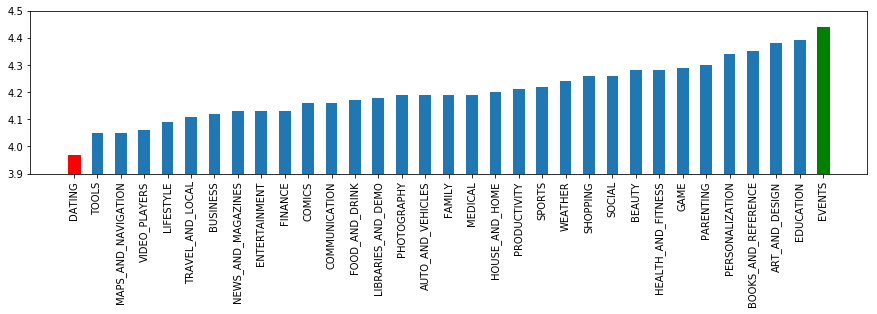

In [10]:
plt.figure(figsize=(15,3))
ax1 = plt.subplot(111)
ret = plt.bar(avg_categ['Category'],avg_categ['AvgRating'],width=.5)
ret[0].set_color('red')
ret[32].set_color('green')
plt.xticks(rotation=90)
plt.ylim(top=4.5)
plt.ylim(bottom=3.9)
plt.show()

In [11]:
newdata = apdata[['Category','Installs','App']].copy()
newdata.head(5)

,Category,Installs,App
0,ART_AND_DESIGN,"10,000+",Photo Editor & Candy Camera & Grid & ScrapBook
1,ART_AND_DESIGN,"500,000+",Coloring book moana
2,ART_AND_DESIGN,"5,000,000+","U Launcher Lite – FREE Live Cool Themes, Hide ..."
3,ART_AND_DESIGN,"50,000,000+",Sketch - Draw & Paint
4,ART_AND_DESIGN,"100,000+",Pixel Draw - Number Art Coloring Book


In [12]:
newdata['Installs']=newdata['Installs'].str.replace(",","").str.replace("+","")

In [13]:
newdata['Installs'] = newdata['Installs'].astype(int)

In [14]:
newdata.head(20)

,Category,Installs,App
0,ART_AND_DESIGN,10000,Photo Editor & Candy Camera & Grid & ScrapBook
1,ART_AND_DESIGN,500000,Coloring book moana
2,ART_AND_DESIGN,5000000,"U Launcher Lite – FREE Live Cool Themes, Hide ..."
3,ART_AND_DESIGN,50000000,Sketch - Draw & Paint
4,ART_AND_DESIGN,100000,Pixel Draw - Number Art Coloring Book
5,ART_AND_DESIGN,50000,Paper flowers instructions
6,ART_AND_DESIGN,50000,Smoke Effect Photo Maker - Smoke Editor
7,ART_AND_DESIGN,1000000,Infinite Painter
8,ART_AND_DESIGN,1000000,Garden Coloring Book
9,ART_AND_DESIGN,10000,Kids Paint Free - Drawing Fun


In [15]:
n = len(pd.unique(newdata['App']))
print(n)

8190


In [16]:
down_categ = newdata.groupby('Category')['Installs'].sum().to_frame(name = '# of Downloads').reset_index()
down_categ.head(5)

,Category,# of Downloads
0,ART_AND_DESIGN,1.242281e+08
1,AUTO_AND_VEHICLES,5.312980e+07
2,BEAUTY,2.691620e+07
3,BOOKS_AND_REFERENCE,1.921292e+09
4,BUSINESS,1.001768e+09


In [17]:
down_categ['# of Downloads'].min()

15949410.0

In [18]:
down_categ['# of Downloads'].max()

35085862717.0

In [19]:
down_categ = down_categ.sort_values('# of Downloads')
down_categ.head(5)

,Category,# of Downloads
10,EVENTS,15949410.0
2,BEAUTY,26916200.0
22,PARENTING,31116110.0
1,AUTO_AND_VEHICLES,53129800.0
20,MEDICAL,53205576.0


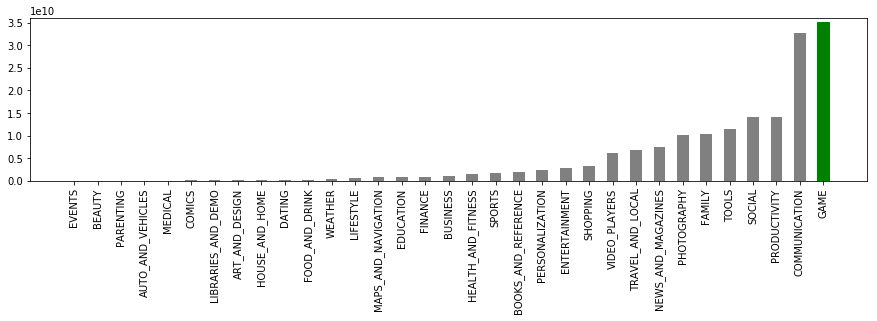

In [20]:
plt.figure(figsize=(15,3))
ax1 = plt.subplot(111)
ret = plt.bar(down_categ['Category'],down_categ['# of Downloads'],width=.5,color='grey')
ret[0].set_color('red')
ret[32].set_color('green')
plt.xticks(rotation=90)
plt.ylim(top=36085862717)
plt.ylim(bottom=14949410)
plt.show()

In [21]:
down_categ['logarithm_base2'] = np.log2(down_categ['# of Downloads'])

In [22]:
print(down_categ['logarithm_base2'].min())
print(down_categ['logarithm_base2'].max())

23.926999721065787
35.0301707857681


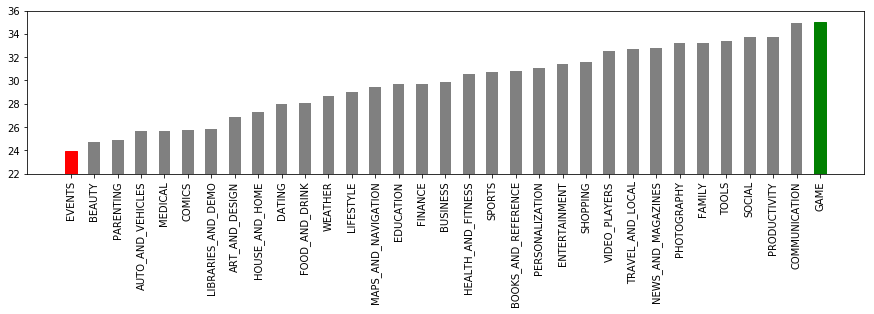

In [23]:
plt.figure(figsize=(15,3))
ax1 = plt.subplot(111)
ret = plt.bar(down_categ['Category'],down_categ['logarithm_base2'],width=.5,color='grey')
ret[0].set_color('red')
ret[32].set_color('green')
plt.xticks(rotation=90)
plt.ylim(top=36)
plt.ylim(bottom=22)
plt.show()

In [24]:
newdata2 = apdata[['Type','Installs']].copy()
newdata2['Installs'] = newdata2['Installs'].str.replace(",","").str.replace("+","")
newdata2.head(5)


,Type,Installs
0,Free,10000
1,Free,500000
2,Free,5000000
3,Free,50000000
4,Free,100000


In [25]:
newdata2['Installs'] = newdata2['Installs'].astype(int)
pie_data = newdata2.groupby('Type')['Installs'].sum().to_frame(name = '# of Downloads').reset_index()
pie_data

,Type,# of Downloads
0,Free,1.675530e+11
1,Paid,7.289158e+07


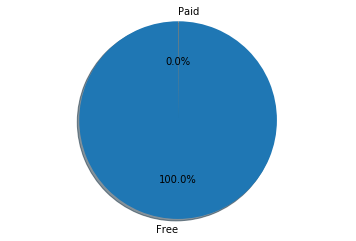

In [26]:
labels = 'Free','Paid'
fig1, ax1 = plt.subplots()
ax1.pie(pie_data['# of Downloads'], labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [27]:
pie_data['# of Downloads'][1]/pie_data['# of Downloads'].sum()*100

0.04348467957859428

In [30]:
freepaid = apdata.groupby('Type')['Rating'].mean().to_frame(name = 'average').reset_index()
freepaid

,Type,average
0,Free,4.186288
1,Paid,4.266822


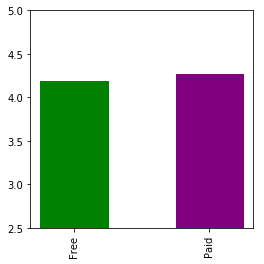

In [31]:
plt.figure(figsize=(4,4))
ax1 = plt.subplot(111)
ret = plt.bar(freepaid['Type'],freepaid['average'],width=.5)
ret[0].set_color('green')
ret[1].set_color('purple')
plt.xticks(rotation=90)
plt.ylim(top=5)
plt.ylim(bottom=2.5)
plt.show()

In [54]:
genre = apdata.groupby('Content Rating')['Rating'].mean().to_frame(name = 'average').reset_index()
genre = genre.sort_values('average')
genre.head(6)

,Content Rating,average
5,Unrated,4.100000
3,Mature 17+,4.123427
1,Everyone,4.186472
4,Teen,4.233487
2,Everyone 10+,4.257179
0,Adults only 18+,4.300000


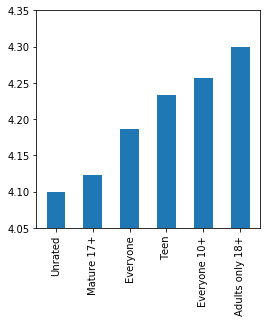

In [57]:
plt.figure(figsize=(4,4))
ax1 = plt.subplot(111)
ret = plt.bar(genre['Content Rating'],genre['average'],width=.5)
plt.xticks(rotation=90)
plt.ylim(top=4.35)
plt.ylim(bottom=4.05)
plt.show()